In [39]:
import pandas as pd
data= pd.read_csv("6.csv")
data

,Time,Front Bearing D,Front Bearing C,Inner Housing Front,Inner Housing Mid,Inner Housing Back,Back Bearing B,Back Bearing A,HousingA,HousingB,Support,Room Temperature,Deformation,Speed
0,1,30.64,30.55,30.60,30.52,30.18,30.78,30.47,30.57,30.61,28.5,30.27,0.25075,6001
1,4,30.84,30.84,30.60,30.52,30.60,30.61,30.74,30.58,30.85,28.5,30.09,0.37215,6001
2,7,30.62,30.77,30.42,30.74,30.36,30.84,30.71,30.47,30.81,28.5,30.15,2.07700,6001
3,10,30.79,30.77,30.62,30.64,30.57,30.99,30.79,30.41,30.83,28.6,30.26,1.13345,6001
4,13,30.68,30.94,30.59,30.51,30.49,30.68,30.57,30.37,30.82,28.5,30.18,1.53955,6001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7918,23642,37.55,38.34,38.88,39.61,39.90,40.97,41.21,37.37,35.90,29.5,30.72,20.28855,6001
7919,23645,37.42,38.32,38.58,39.28,39.86,41.04,40.95,37.37,35.67,29.5,30.70,20.33600,6001
7920,23648,37.57,38.22,38.51,39.30,39.83,41.09,41.11,37.26,35.80,29.5,30.66,20.25115,6001
7921,23651,37.71,38.35,38.76,39.45,40.12,40.99,40.82,37.45,35.85,29.6,30.71,20.14025,6001


In [54]:
#將時間還有變形量移除
data2= pd.read_csv("6.csv",usecols=[4,5,6,7,8])
data2

,Inner Housing Mid,Inner Housing Back,Back Bearing B,Back Bearing A,HousingA
0,30.52,30.18,30.78,30.47,30.57
1,30.52,30.60,30.61,30.74,30.58
2,30.74,30.36,30.84,30.71,30.47
3,30.64,30.57,30.99,30.79,30.41
4,30.51,30.49,30.68,30.57,30.37
...,...,...,...,...,...
7918,39.61,39.90,40.97,41.21,37.37
7919,39.28,39.86,41.04,40.95,37.37
7920,39.30,39.83,41.09,41.11,37.26
7921,39.45,40.12,40.99,40.82,37.45


In [55]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# to make this notebook's output identical at every run
np.random.seed(42)

In [56]:
x=data2
y=data.Deformation

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [58]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=335,criterion='mse', max_depth=10, min_samples_split=2, min_samples_leaf=5, max_features=5, random_state=42)
predict=model.fit(x_train,y_train).predict(x_test)
predict

array([20.05740673, 13.4951251 , 20.04561662, ..., 20.05892204,
       20.0492263 , 20.05743964])

In [59]:
from sklearn.metrics import mean_squared_error

from math import sqrt

rmse = sqrt(mean_squared_error(y_test,predict))

print(rmse)

0.15899064851057418


<function matplotlib.pyplot.show(*args, **kw)>

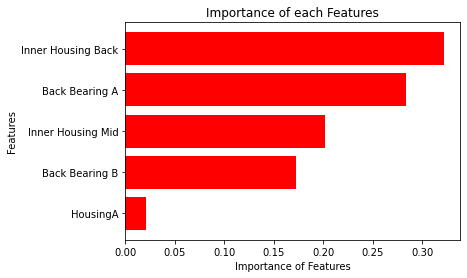

In [60]:
imp=model.feature_importances_
imp
import matplotlib.pyplot as plt
%matplotlib inline
names=data2.columns
zip(imp,names)
imp,names=zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)),imp,align='center',color="red")
plt.yticks(range(len(names)),names)
plt.xlabel('Importance of Features')
plt.ylabel('Features')
plt.title('Importance of each Features')
plt.show

In [61]:
print("Traing Score:%f"%model.score(x_train,y_train))
print("Testing Score:%f"%model.score(x_test,y_test))

Traing Score:0.996699
Testing Score:0.995922


In [63]:
import pandas as pd
data3= pd.read_csv("6000rpm.csv")
data4= pd.read_csv("6000rpm.csv",usecols=[4,5,6,7,8])
x2=data4
y2=data3.Deformation

In [64]:
from sklearn.ensemble import RandomForestRegressor
predict_df=[]
model=RandomForestRegressor(n_estimators=300,criterion='mse', max_depth=10, min_samples_split=2, min_samples_leaf=5, max_features=5, random_state=42)
model.fit(x_train,y_train)
for m in range(0, len(x2)):
    X_new = [x2.iloc[m,:]]
    predict_df.append(model.predict(X_new))

In [65]:
import pandas as pd

#產出CSV檔                
def Output5000():   
    Result ='C://Users/User/Desktop/6001re.csv'
    df_SAMPLE = pd.DataFrame.from_dict( predict_df )
    df_SAMPLE.to_csv( Result  , index=False )
    print( '成功產出'+Result )

In [66]:
Output5000()

成功產出C://Users/User/Desktop/6001re.csv
